#### Ejercicio 1: Red recurrente lineal y determinista

Dada una red neuronal lineal que cuya dinámica satisface la siguiente ecuación:

![Ecuación 1](./images/ec1.jpg)

Donde **r** es el vector de respuestas neuronales (tasas de disparo), **W** es la matriz de pesos sinápticos y **h(t)** es una entrada a la red (ruído, estímulos erternos, entradas de otras redes, etc.)

Considere una red con dos neuronas, una ercitatoria y una inhibitoria 1, que están conectadas recíprocamente con peso de la misma magnitud **a**.

a) Dibuje la red de dos neuronas (con sus coneriones y respectivos pesos). Usen Paint, no se gasten mucho. (5 puntos)

b)¿Cómo es la matriz de pesos W? ¿Cuáles son sus autovalores? (5 puntos)

![Ejercicios 1.a y 1.b](./images/ej1ab.jpeg)

c) Resuelva para conseguir la dinámica del sistema de manera analítica, partiendo de condición inicial con las dos neuronas activas (r=(1,1)^T) y sin ninguna entrada (es decir,h=0). Para esto, calcule los autovalores y autovectores y haga el desarrollo diagonalizando la matriz como vimos en clase. Puede usar Wolfram Alpha para invertir matrices. (10 puntos).

![Ejercicio 1.c Parte 1](./images/ej1c_1.jpeg)
![Ejercicio 1.c Parte 2](./images/ej1c_2.jpeg)

d) Grafique la trayectoria del sistema en 2D (con r1 en el eje horizontal y r2 en el eje vertical). (5 puntos)

e) Grafique la trayectoria de cada neurona vs tiempo. (5 puntos)


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [50]:
def neuron_e(t, a, tau):
    return (np.exp(-t) * (np.cos(a*t) + np.sin(a*t)))/tau

def neuron_i(t, a, tau):
    return (np.exp(-t) * (np.cos(a*t) - np.sin(a*t)))/tau

def r_dot(t, a, tau):
    return (neuron_e(t, a, tau), neuron_i(t, a, tau))

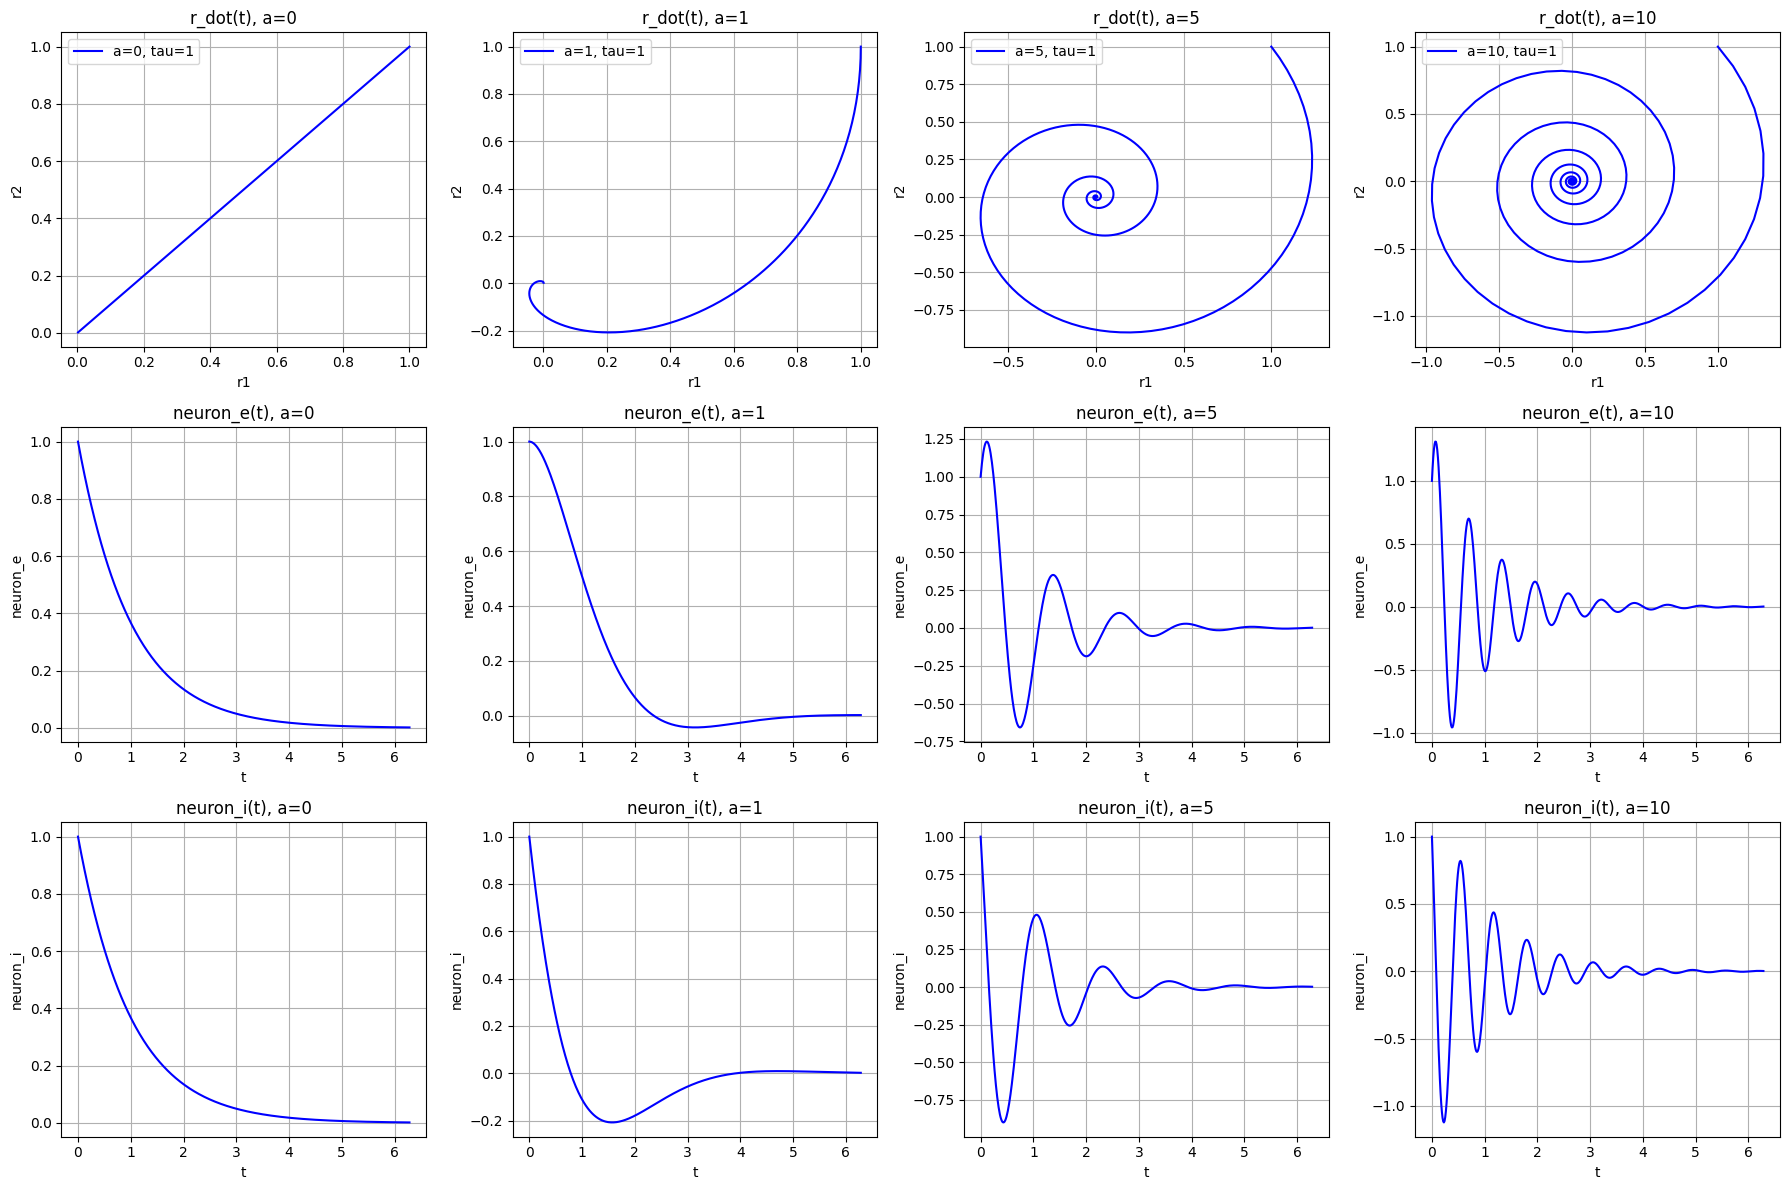

In [51]:
tau = 1
t_values = np.linspace(0, 2*np.pi, 500)

# Valores de "a" para iterar
a_values = [0, 1, 5, 10]

# Crear la figura y los subplots
fig, axs = plt.subplots(3, len(a_values), figsize=(18, 12))

for i, a in enumerate(a_values):
    # Plot de r_dot(t)
    x, y = r_dot(t_values, a, tau)
    axs[0, i].plot(x, y, label=f'a={a}, tau={tau}', c='b')
    axs[0, i].set_xlabel('r1')
    axs[0, i].set_ylabel('r2')
    axs[0, i].set_title(f'r_dot(t), a={a}')
    axs[0, i].legend()
    axs[0, i].grid(True)

    # Plot de la neurona 1 contra el tiempo
    axs[1, i].plot(t_values, neuron_e(t_values, a, tau), c='b')
    axs[1, i].set_xlabel('t')
    axs[1, i].set_ylabel('neuron_e')
    axs[1, i].set_title(f'neuron_e(t), a={a}')
    axs[1, i].grid(True)

    # Plot de la neurona 2 contra el tiempo
    axs[2, i].plot(t_values, neuron_i(t_values, a, tau), c='b')
    axs[2, i].set_xlabel('t')
    axs[2, i].set_ylabel('neuron_i')
    axs[2, i].set_title(f'neuron_i(t), a={a}')
    axs[2, i].grid(True)

plt.tight_layout()
plt.show()

#### Ejercicio 2

a) Convierta la ecuación diferencial de arriba a su versión en tiempo discreto de la forma:

![Ecuación 2](./images/ec2.jpg)

relacionando B a W (asumiendo que dt<<1). (5 puntos)


![Ejercicio 2.a](./images/ej2a.jpeg)

b) Simule el sistema, muestreando ruido de ht de una distribución normal bivariada con covarianza proporcional a la matriz identidad (es decir, ruido independiente para cada neurona con desvío estándar σ). Con numpy, pueden muestrear usando h = np.random.normal(scale=0.01, size=(n_timesteps, 2)). Utilice a=10, dt=0.01 y empiece con las mismas condiciones iniciales que el Ejercicio 1c. Haga los mismos gráficos que en el Ejercicio 1d y 1e. (10 puntos)

In [52]:
def generate_random_noise(size, scale=0.01):
    """Generate random noise with normal distribution."""
    return np.random.normal(scale=scale, size=size)

def update_r(i, w, dt, r, noise=None):
    """Calculate the next r value with given parameters and noise."""
    next_r = ((i * (1 - dt) + dt * w) @ r)
    if noise is not None:
        next_r = next_r + noise
    return np.reshape(next_r, (1, 2, 1))

def r_discrete(t0, tf, dt, a, noise=True):
    t_values = np.arange(t0, tf, dt)
    h = generate_random_noise(size=(t_values.size, 2, 1)) if noise else None
    r = np.array([[[1], [1]]])
    w = np.array([[0, a], [-a, 0]])
    i = np.identity(2)

    for index in range(t_values.size):
        noise_term = h[index] if noise else None
        next_r = update_r(i, w, dt, r[index], noise_term)
        r = np.concatenate((r, next_r), axis=0)

    return r

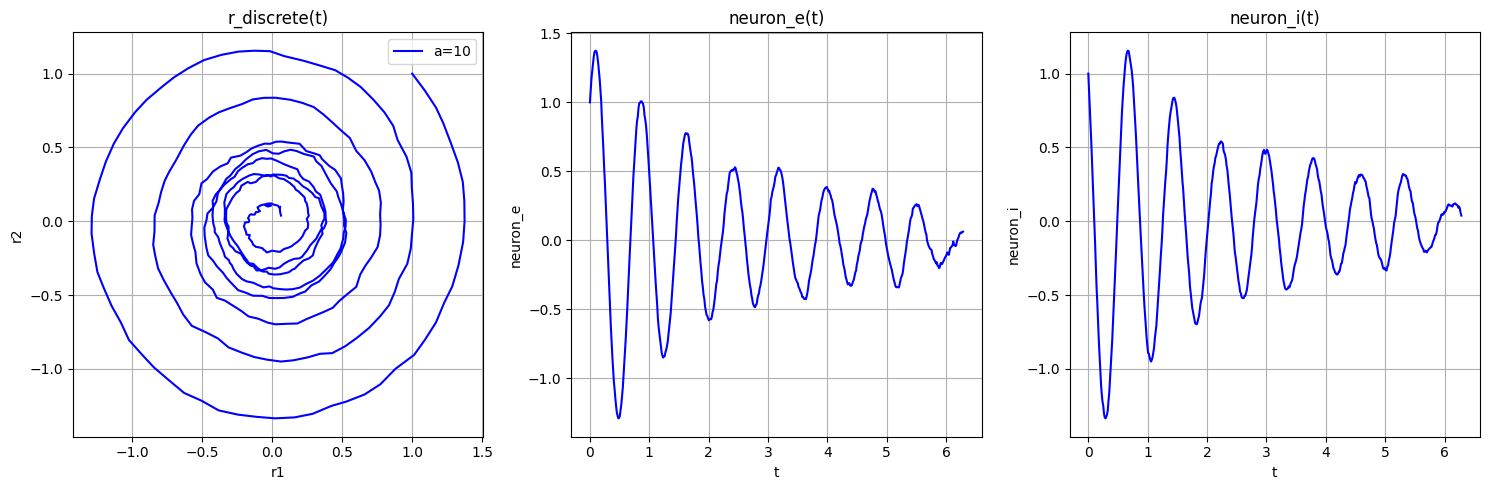

In [53]:
# Condiciones iniciales
t0 = 0
tf = 2*np.pi
dt= 0.01
a = 10

r = r_discrete(t0, tf, dt, a)

n1 = np.resize(r[:, 0], t_values.size)
n2 = np.resize(r[:, 1], t_values.size)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
color = 'b'

# Plot de r_discrete(t)
axs[0].plot(n1, n2, label=f'a={a}', color=color)
axs[0].set_xlabel('r1')
axs[0].set_ylabel('r2')
axs[0].set_title('r_discrete(t)')
axs[0].legend()
axs[0].grid(True)

# Plot de la neurona 1 contra el tiempo
axs[1].plot(t_values, n1, color=color)
axs[1].set_xlabel('t')
axs[1].set_ylabel('neuron_e')
axs[1].set_title('neuron_e(t)')
axs[1].grid(True)

# Plot de la neurona 2 contra el tiempo
axs[2].plot(t_values, n2, color=color)
axs[2].set_xlabel('t')
axs[2].set_ylabel('neuron_i')
axs[2].set_title('neuron_i(t)')
axs[2].grid(True)

plt.tight_layout()
plt.show()

c) Corra esta simulación K=50 veces, ploteando los puntos como puntos (es decir, como gráfico de dispersión en vez de traza) y coloreando todos los puntos correspondientes a cierto tiempo del mismo color (es decir, 50 puntos de un color para t=0, 50 puntos de otro color para t=1, etc.). ¿Qué observa en la varianza de rt en el tiempo? (5 puntos)

In [61]:
def generate_cases(k, t0, tf, dt, a):
    cases = []
    for _ in range(k):
        r = r_discrete(t0, tf, dt, a)
        cases.append(r)
    return np.array(cases)

def plot_cases(cases, tf, dt, a):
    plt.figure(figsize=(10, 10))

    # Transpose cases for easier plotting
    cases = np.transpose(cases, (1, 2, 3, 0))

    colors = cm.hsv(np.linspace(0, 1, len(cases[0, 0, 0])))

    # Plot all cases
    for i, case in enumerate(cases):
        n1 = case[0, :]
        n2 = case[1, :]
        plt.scatter(n1, n2, s=4, color=colors[i % len(colors)])

    # Plot the case without noise for reference
    r = r_discrete(0, tf, dt, a, noise=False)
    plt.plot(r[:, 0], r[:, 1], label='Sin ruido', color='b')

    plt.xlabel('r1')
    plt.ylabel('r2')
    plt.legend()
    plt.show()

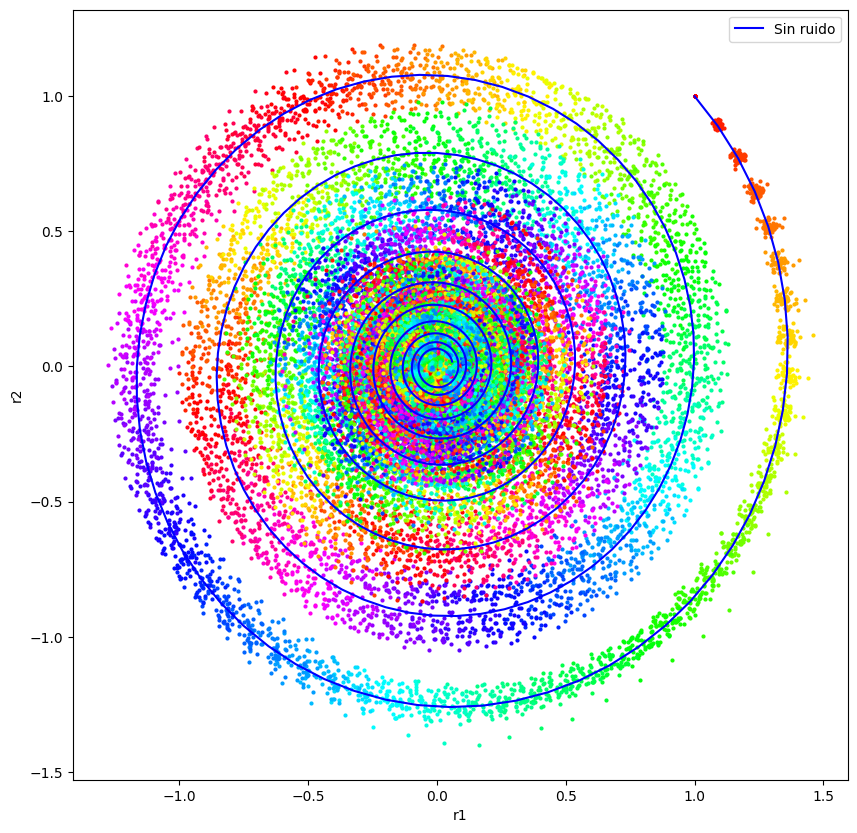

In [62]:
# Parameters
k = 50
dt = 0.01
tf = 2 * np.pi

# Generate and plot cases
cases = generate_cases(k, 0, tf, dt, 10)
plot_cases(cases, tf, dt, 10)

Inicialmente, la señal es uniforme, pero se vuelve cada vez más ilegible con el tiempo, lo que provoca un aumento proporcional en la varianza de 𝑟_𝑡. 

A medida que el tiempo avanza, se incrementa la dispersión en la nube de puntos, y en comparación con la versión sin ruido que vimos anteriormente, se observa que las distintas ejecuciones muestran conglomeraciones que aumentan en radio siguiendo la línea hacia el centro de la figura. Este fenómeno se debe a la influencia creciente del ruido que distorsiona los datos paso a paso.

#### Ejercicio 3

a) Considere una red con dinámica “Winner-Take-All” definida por las ecuaciones diferenciales

![Sistema 3a](./images/ec3_a.jpg)

Con **𝜏=10, K1=K2=K3=80** y la función **S** siendo la función Naka-Rushton (un tipo de versión sigmoidea, pueden graficarla)

![Funcion 3a](./images/ec3_a2.jpg)

Esencialmente es un sistema donde cada neurona (con actividad Ei) inhibe a las otras con peso sináptico de -5. Calcule los puntos fijos. Son cuatro puntos: tres simétricos (donde Ei=a y E!=1=0, es decir, 2 de las 3 neuronas valen 0) y otro donde las tres neuronas valen lo mismo (E1= E2= E3). En cualquiera de los casos las ecuaciones se simplifican. Para el caso simétrico, puede ser conveniente usar un solver numérico (*from scipy.optimize import fsolve*). (10 puntos)

![Ejercicio 3.a (1)](./images/ej3a1.jpeg)
![Ejercicio 3.a (2)](./images/ej3a2.jpeg)

b) Simule trayectorias del sistema empezando de distintos puntos aleatorios (recuerden que Ei>0) y coloreando por el atractor (asimétrico) hacia el que converge. ¿Cómo depende el resultado al que converge de la inicialización? Puede usar un integrador de Euler, Runge-Kutta 4, o el que lo haga feliz. (10 puntos)

In [56]:
def s(x):
    if x < 0:
        return 0
    return (100 * x**2) / (40**2 + x**2)


def f(y):
    k1 = 80
    k2 = 80
    k3 = 80
    tau = 10
    e1, e2, e3 = y
    de1dt = (-e1 + s(k1 - 5*e2 - 5*e3))/tau
    de2dt = (-e2 + s(k2 - 5*e1 - 5*e3))/tau
    de3dt = (-e3 + s(k3 - 5*e1 - 5*e2))/tau
    return np.array([de1dt, de2dt, de3dt])


def rk4(f, steps, h, e0):
    E = np.zeros((steps + 1, len(e0)))
    E[0] = e0
    for i in range(steps):
        k1 = h * f(E[i])
        k2 = h * f(E[i] + k1 / 2)
        k3 = h * f(E[i] + k2 / 2)
        k4 = h * f(E[i] + k3)
        E[i + 1] = E[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return E

In [57]:
def simulate_and_plot(n, steps, h, e0_range):
    fig = plt.figure(figsize=(10, 8))

    for i in range(n):
        e0 = np.random.uniform(e0_range[0], e0_range[1], size=3)
        E = rk4(f, steps, h, e0)

        ax = fig.add_subplot(2, (n+1)//2, i+1, projection='3d')
        ax.plot(E[:, 0], E[:, 1], E[:, 2], color='r')
        ax.scatter(E[0, 0], E[0, 1], E[0, 2], color='g', label=f'E0:({E[0,0]:.2f}, {E[0, 1]:.2f}, {E[0, 2]:.2f})')
        ax.scatter(E[-1, 0], E[-1, 1], E[-1, 2], color='b', label=f'Ef:({E[-1,0]:.2f}, {E[-1, 1]:.2f}, {E[-1, 2]:.2f})')
        ax.set_xlabel('E1')
        ax.set_ylabel('E2')
        ax.set_zlabel('E3')
        ax.legend()

    plt.tight_layout()
    plt.show()

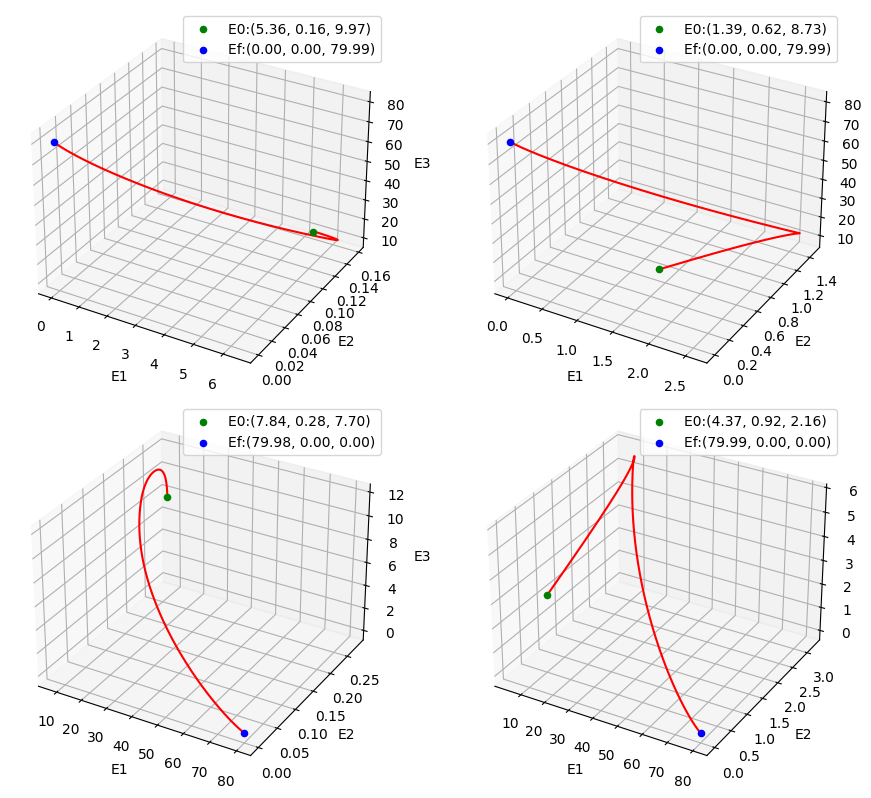

In [58]:
num_trajectories = 4
steps = 10000
h = 0.01
e0_range = [0, 10]
simulate_and_plot(num_trajectories, steps, h, e0_range)

Después de experimentar con diferentes valores iniciales, se nota que el sistema converge a un valor de 80 en la coordenada inicial con la magnitud más alta y a 0 en las otras coordenadas.

c) ¿Qué pasa si inicializan el sistema justo sobre puntos simétricos (distintos al fijo)? (E1=E2=E3≠E*) (grafique no solo en 3D si no E1 vs tiempo) (5 puntos)

In [59]:
def simulate_and_plot_equal_ei(n, steps, h, e0_range):
    fig = plt.figure(figsize=(10, 8))

    for i in range(n):
        e0 = np.full(3, np.random.uniform(e0_range[0], e0_range[1]))
        E = rk4(f, steps, h, e0)

        ax = fig.add_subplot(2, (n+1)//2, i+1, projection='3d')
        ax.plot(E[:, 0], E[:, 1], E[:, 2], color='r')
        ax.scatter(E[0, 0], E[0, 1], E[0, 2], color='g', label=f'e_0:({E[0,0]:.2f}, {E[0, 1]:.2f}, {E[0, 2]:.2f})')
        ax.scatter(E[-1, 0], E[-1, 1], E[-1, 2], color='b', label=f'e_f:({E[-1,0]:.2f}, {E[-1, 1]:.2f}, {E[-1, 2]:.2f})')
        ax.set_xlabel('e1')
        ax.set_ylabel('e2')
        ax.set_zlabel('e3')
        ax.legend()

    plt.tight_layout()
    plt.show()

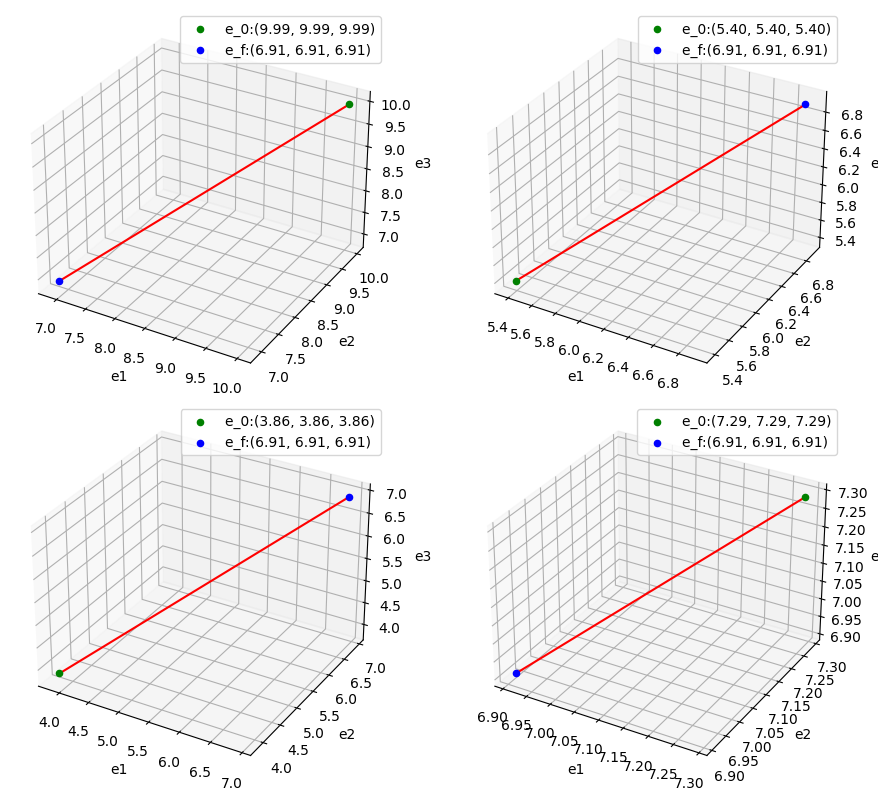

In [60]:
num_trajectories = 4
steps = 10000
h = 0.01
e0_range = [0, 10]
simulate_and_plot_equal_ei(num_trajectories, steps, h, e0_range)

Notemos que si se inicializa al sistema en puntos siméticos, el mismo converge al punto (6.91, 6.91, 6.91).